# 3D7 - Finite Element Method

---


##Before you begin

**IMPORTANT:** Before you do anything, you need to click “Copy to Drive” above this message, otherwise your changes won’t be saved! You can’t break the notebook for anyone else, but your work won’t be saved unless you do this!

<img src='https://docs.google.com/uc?export=download&id=1c5aWac_AK4AUA9KvlROIJS9vca0UJUfL' height=150/>

## A note about Google Colab hosted Jupyter Notebooks

This lab uses a [Jupyter Notebook](https://jupyter.org/) hosted by Google Colab as a "digital handout" with interactive analysis and data plotting:

1. These are editable documents where you can write and run code.
2. There are 2 types of "cell" that can hold information: a "Text" cell and a "Code" cell. Most notebooks will include both.
3. **Text cells** are there for information, this sentence is currently in a text cell. You would generally use these to explain what the code in a Code cell will do and to separate the notebook into sections.
4. **Code cells** are where you write your code in Python, **when you hover over them an arrow (or "Play" button) appears on the left. You can click this to run that piece of code.** You can also run the code by clicking anywhere in the code cell and pressing Ctrl+Enter.

**IMPORTANT: Always run code cells sequentially!** Think of this like steps in an instruction booklet or recipe - if you skip out a step, or do them in the wrong order, something generally goes wrong further down the line! Numbers will appear in square brackets on the left of each code cell once you run it (in the same place as the arrow you clicked), to tell you the order you've ran them in. The first code cell you click on will say [1], the second [2], etc.

For more information on Jupyter notebooks and Google Colaboratory, in the menu click 'File', then 'Open notebook', then click on the notebook 'Welcome to Colaboratory' and read through this, which explains some more basics.

**Troubleshooting:** (in case something goes wrong)
* Ensure you've ran all code cells sequentially. Check the numbers in square brackets!
* If you want to reset the notebook in its current state (e.g. you can't figure out which code cell you ran last and would like to start over), in the menu click 'Runtime', then 'Factory reset runtime'. You need to start again every time you do this, rerunning all code cells from the beginning and in order!
* If you think you've changed something in a code cell that means the notebook doesn't work anymore (e.g. you keep getting errors), and you can't undo it, don't stay stuck for too long. Instead, click the original link in the handout and start again.

---



# Introduction

# 1. Installation of the finite element package [FEniCS](https://fenicsproject.org/)

The block of code below installs the finite element package FEniCS.

In [1]:
!wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"

--2021-08-18 08:59:24--  https://fem-on-colab.github.io/releases/fenics-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1946 (1.9K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   1.90K  --.-KB/s    in 0s      

2021-08-18 08:59:24 (24.4 MB/s) - ‘/tmp/fenics-install.sh’ saved [1946/1946]

+ PYBIND11_INSTALL_SCRIPT_PATH=https://fem-on-colab.github.io/releases/pybind11-install.sh
+ [[ https://fem-on-colab.github.io/releases/pybind11-install.sh == http* ]]
+ wget https://fem-on-colab.github.io/releases/pybind11-install.sh -O /tmp/pybind11-install.sh
--2021-08-18 08:59:24--  https://fem-on-colab.github.io/releases/pybind11-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.1

In [2]:
import ufl
import dolfin

**Important** Now you need to restart the runtime (in the menu: Runtime->Restart Runtime). 

# 2. Installation of the package [gmsh](https://gmsh.info/)

The block of code below installs gmsh, an open source finite element mesh generator.

In [4]:
!pip3 install gmsh==4.7.0
import sys
sys.path += ['/usr/local/lib/python3.7/site-packages/gmsh-4.7.0-Linux64-sdk/lib']

# 3. Creating your mesh

Now we will create a mesh for the quarter of a strip of width 100 mm, length 300 mm, thickness 1 mm with a hole of radius R = 14.8 mm (Figure 1 in the handout).

In [5]:
# Import some packages: gmsh, the sys package to allow command line commands to be executed from the Python interpreter and the math package
import gmsh
import sys
import math

# Initialise gmsh
gmsh.initialize(sys.argv)
# Ask gmsh to display information in the terminal
gmsh.option.setNumber("General.Terminal", 1)
# Select the gmsh file format
gmsh.option.setNumber("Mesh.MshFileVersion", 2.0)

# Create a model and name it "PlateSymmetric"
model = gmsh.model
model.add("PlateSymmetric")

# Define the parameters
L = 150; # half-length of the plate
w = 50; # half-width of the plate
r = 14.8; # radius of the hole
hmin = 8; # min element size
hmax = 8; # max element size

# Create Points to define the mesh geometry
holecenter = model.geo.addPoint(0,0,0, hmin, 1)
holeedge1 = model.geo.addPoint(r, 0, 0, hmin, 2)
bottomrightcorner = model.geo.addPoint(L, 0, 0, hmax, 3)
toprightcorner = model.geo.addPoint(L, w, 0, hmax, 4)
topleftcorner = model.geo.addPoint(0, w, 0, hmax, 5)
holeedge2 = model.geo.addPoint(0, r, 0, hmin, 6)

# Create straight lines
lines = []
lines.append(model.geo.addLine(2, 3, 1))
lines.append(model.geo.addLine(3, 4, 2))
lines.append(model.geo.addLine(4, 5, 3))
lines.append(model.geo.addLine(5, 6, 4))
# Create a circle arc
lines.append(model.geo.addCircleArc(6, 1, 2))
# Define a curve loop by combinnig the lines and the circle arc
curveloop = model.geo.addCurveLoop([1,2,3,4,5])
# Define a surface inside the curve loop
disk = model.geo.addPlaneSurface([curveloop])

# Synchronize the CAD kernel with the gmsh model
gmsh.model.geo.synchronize()
# Create the 2D mesh
model.mesh.generate(2)
# Write the mesh in a .msh file
gmsh.write("mesh.msh")
# Finalize gmsh
gmsh.finalize()

**TASK** Notice the parameters *hmin* and *hmax* in the block of code above. You will need to adjust these when you will investigate the effect of coarsening/refining the mesh.

Next, we import FEniCS and use the utility *meshconvert* to convert the .msh mesh file in xml format. 

In [6]:
from fenics import *
from dolfin_utils.meshconvert import meshconvert
meshconvert.convert2xml("mesh.msh", "mesh2.xml", "gmsh")

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 179 vertices
Found all vertices
Expecting 305 cells
Found all cells
Conversion done


Eventually, we read the xml mesh file within FEniCS and we plot the mesh.

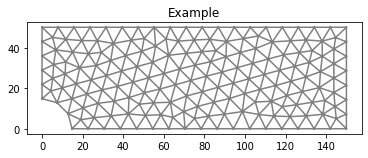

In [7]:
mesh = Mesh("mesh2.xml")
plot(mesh, title="Example")

**Task** Change the parameters *hmin* and *hmax* in the definition of the mesh above and see how this changes the mesh geometry.

Print the number of elements in the mesh.

In [ ]:
print(mesh.num_cells())

305


# 4. Define the elasticity problem

The next step is to define the elasticity problem in weak form. First, we define the problem parameters.

In [ ]:
stressload = 58 # imposed stress (N/mm^2)
w = 50 # plate half width (mm)
R = 14.8 # hole radius (mm)
L = 150. # plate half length (mm)

We then define the elastic behaviour for aluminium: Young's modulus, Poisson's ratio and the Lamé coefficients mu and lambda (as defined in the handout).

In [ ]:
E = Constant(70000) # Young's modulus (MPa)
nu = Constant(0.33) # Poisson's ratio 
mu = E/2/(1+nu)
lmbda = E*nu/(1+nu)/(1-2*nu)

We define the 2D deformation *eps* and the 2D stress *sigma*. Notice we use plane stress (as detailed in the handout, *eps* and *sigma* correspond respectively to $\varepsilon^\star$ and $\sigma^\star$ in the handout). Note that we use the [UFL](https://fenics.readthedocs.io/projects/ufl/en/latest/) language from the FEniCS package to express the weak form of the linear elasticity equations.

In [ ]:
def eps(v):
    return sym(grad(v))

In [ ]:
def sigma(v):
    return (2*mu*lmbda/(lmbda+2*mu))*tr(eps(v))*Identity(2) + 2.0*mu*eps(v)

We define the boundary domain for the natural boundary conditions (stress applied along the right-hand side edge of the plate).

In [ ]:
# first, we define the right-hand side edge (x=L)
class Right(SubDomain):
	def inside(self, x, on_boundary):
		return near(x[0], L)
# we define a scalar function over all vertices on the boundary, and we set the function to zero
exterior_facet_domains = MeshFunction("size_t", mesh, mesh.topology().dim()-1)
exterior_facet_domains.set_all(0)
# we set the function to 1 for vertices on the right-hand side edge
Right().mark(exterior_facet_domains, 1)
# we define a surface integral based on this function
ds = Measure("ds")(subdomain_data=exterior_facet_domains)

We now have all the ingredients to define the elasticity problem in weak form, using the notations from the 3D7 handout and from the lab handout: 

>$$\int_\Omega (\mathbf{\nabla}_S \mathbf{w})^T \overline{\mathbf{\sigma}} \, \mathrm{d}A = \int_{\partial \Omega_\sigma} w_x \, \sigma_0 \mathrm{d}\Gamma$$

where $\mathbf{w}=\left[w_x\, w_y\right]^T$ is a test function and $\partial \Omega_\sigma$ corresponds to the right-hand side boundary of the domain $\Omega$ and $\overline{\mathbf{\sigma}}=\left[\sigma_{xx}\, \sigma_{yy}\, \sigma_{xy}\right]^T$ (compare with the equation in section 7.6 of the 3D7 handout). This equation is implemented in the code below. Notice that FEniCS actually implements the weak form using the matrix form of sigma labelled $\sigma^\star$ in the lab handout.

In [ ]:
s = Constant((stressload, 0.0)) # we define the vector of applied stress
V = VectorFunctionSpace(mesh, 'Lagrange', degree=2) # we define the type of finite element we want to use (here Lagrange elements of degree 2)
u_ = TrialFunction(V) # we define the trial function
w_ = TestFunction(V) # we define the displacement test function
a = inner(sigma(u_), eps(w_))*dx # first term in the weak form (work of internal forces)
l = inner(s, w_)*ds(1) # second term in the weak form (work of external forces)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


Eventually, we define the essential boundary conditions.

In [ ]:
# we  define the left-hand, bottom and right-hand edges of the plate, respectively x=0, y=0 and x=L
def left(x, on_boundary):
    return near(x[0], 0.)

def bottom(x, on_boundary):
    return near(x[1], 0.)

def right(x, on_boundary):
		return near(x[0], L)

# we define the relevant essential boundary condition on the bottom and left-hand edge of the domain
bcx = DirichletBC(V.sub(0), Constant((0.)), left)
bcy = DirichletBC(V.sub(1), Constant((0.)), bottom)
# bcload = DirichletBC(V.sub(0), Constant((load)), right) # add these boundary conditions for a displacement controled simulation
# bc = [bcx, bcy, bcload] # for a displacement controled simulation, you need to replace the line below by this line
bc = [bcx, bcy]

**TASK** Find what you will need to change in the definition of the weak form above in the case of a displacement controlled simulation.

# 5. Solve the problem

We are now ready to solve the elasticity problem.

In [ ]:
u = Function(V, name="Displacement")
solve(a == l, u, bc)

We plot the displacement result for a first visual check.

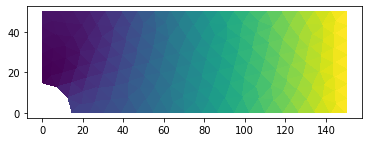

In [ ]:
plot(u, mode="displacement")

We print the size of the displacement vector u, this is the number of degrees of freedom.

In [ ]:
u.vector()[:].size

1324

**TASK** What parameters does this number depend on? 

#6. Analyse your results

This is the most important step in a finite element analysis. You need to analyse and interpret the results from the finite element simulation. Here, we will use two python modules: [matplotlib](https://matplotlib.org/) for plotting and [numpy](https://numpy.org/) for general computations.

First, we compute the stress corresponding to our numerical solution.

In [ ]:
Vsig = TensorFunctionSpace(mesh, "DG", degree=1) # we define a finite element interpolation for the stress
sig = Function(Vsig, name="Stress") # we define the stress function
sig.assign(project(sigma(u), Vsig)) # we project sigma(u) on the corresponding basis of shape functions
print("Stress at (0,R):", sig(0.001, R+0.001)) # we print the stress in the vicinity of the hole

Calling FFC just-in-time (JIT) compiler, this may take some time.
Stress at (0,R): [161.50653372  -3.27771175  -3.27771175  16.63245716]


Next, we plot the horizontal stress field (sigma_xx). 

Calling FFC just-in-time (JIT) compiler, this may take some time.


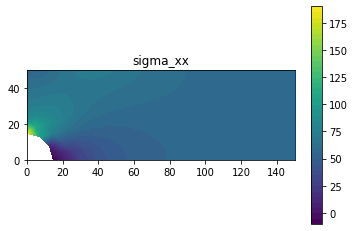

In [ ]:
from matplotlib import pyplot # we import the matplotlib module 
stressplot = plot(sig[0, 0], wireframe=True, title="sigma_xx") 
pyplot.colorbar(stressplot)

**TASK** What do you notice from this stress plot? Does the spatial variation of the stress over the domain depend on the intensity of the applied tension? 

We rescale the stress by the intensity of the horizontal stress near the right-hand boundary. This gives us the stress concentration factor throughout the domain.

In [ ]:
sigma0 = sig(L, 0)[0] # we define the horizontal stress near the right-hand boundary
print(sigma0) # we print the value to check it corresponds to the natural boundary condition
sig_rescaled = Function(Vsig, name="Stress")
sig_rescaled.assign(project(sigma(u)/sigma0, Vsig)) # we define the rescaled stress

58.004575305604114
Calling FFC just-in-time (JIT) compiler, this may take some time.


We plot some profiles of the stress concentration factor in the plate.

Please do not use these plots in your report, here we will just use them as an initial qualitative check for the results. See Section 7 below about exporting the results so that you can create plots for your report.

In [ ]:
# we import the numpy and math packages.
import numpy as np 
import math
# we define sets of horizontal and vertical coordinates
n=math.floor(w/4)
x = np.linspace(R+0.01,L,n)
y = np.linspace(R+0.01,w,n)

In [ ]:
# we define horizontal and vertical rescaled stress profile along the left-hand and bottom edge of the domain
sig_xx_horizontalprofile = [sig_rescaled(xi, 0.)[0] for xi in x]
sig_xx_verticalprofile = [sig_rescaled(0., yi)[0] for yi in y]
sig_yy_horizontalprofile = [sig_rescaled(xi, 0.)[3] for xi in x]
sig_yy_verticalprofile = [sig_rescaled(0., yi)[3] for yi in y]

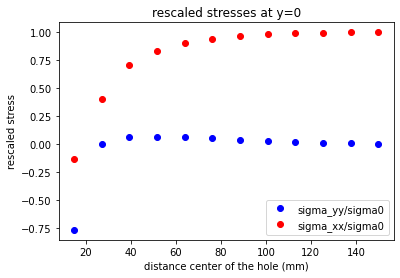

In [ ]:
# we plot the rescaled stress profiles along the bottom edge of the domain (y=0)
import matplotlib.pyplot as plt
plt.plot(x,sig_yy_horizontalprofile,'bo',label='sigma_yy/sigma0')
plt.plot(x,sig_xx_horizontalprofile,'ro',label='sigma_xx/sigma0')
plt.ylabel("rescaled stress")
plt.xlabel("distance center of the hole (mm)")
plt.title("rescaled stresses at y=0")
plt.legend()

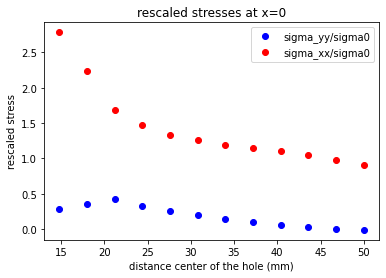

In [ ]:
# we plot the rescaled stress profiles along the left-hand boundary of the domain (x=0)
import matplotlib.pyplot as plt
plt.plot(y,sig_yy_verticalprofile,'bo',label='sigma_yy/sigma0')
plt.plot(y,sig_xx_verticalprofile,'ro',label='sigma_xx/sigma0')
plt.ylabel("rescaled stress")
plt.xlabel("distance center of the hole (mm)")
plt.title("rescaled stresses at x=0")
plt.legend()

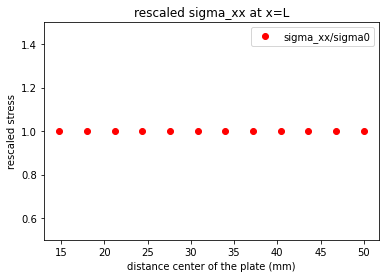

In [ ]:
# we plot the rescaled stress along the right-hand boundary and we check it is equal to 1
bcsy = [sig_rescaled(L, yi)[0] for yi in y]
plt.plot(y,bcsy,'ro',label='sigma_xx/sigma0')
plt.ylabel("rescaled stress")
plt.xlabel("distance center of the plate (mm)")
plt.title("rescaled sigma_xx at x=L")
plt.ylim(0.5,1.5)
plt.legend()

# 7. Exporting your results

Now we have qualitatively checked the quality of our numerical results, we need to assess their accuracy. To that end, you will export your results so that you can post-process them with a software of your choice: matlab, python, python in a colab notebook, excel, ...

## Mount your google drive and export results

To export the results, we first need to authorise your Google Account using the following code cell.

**Important**: Make sure you use the same Google Account throughout!

Run the code cell below and follow the instructions that appear:


*   Click the link that appears below, which will open a new tab.
*   If you're logged into more than one Google Account, you'll be prompted which to use, or you may be asked to sign in. Choose/sign in to the account you used for this notebook (which ought to be your @cam.ac.uk account). If you don't it won't be obvious until you get an error in the next section.
*   Click "Allow" at the bottom.
*   Copy the code that appears, paste it below where it says "Enter verification code", and hit Enter.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now, create a 3D7 folder in your google drive. Once the folder has been created, run the following command to move into that folder.

In [ ]:
%cd /content/drive/My\ Drive/3D7

/content/drive/My Drive/3D7


You can now save your rescaled stress profiles as .txt files. The block of code below will create two files. Each of these files has two rows, the first one contains the vector of x coordinates in mm, the second one contains the values of the rescaled stress.

In [ ]:
import numpy as np
np.savetxt("stress-yy.txt", (x,sig_yy_horizontalprofile))
np.savetxt("stress-xx.txt", (x,sig_xx_horizontalprofile))

You can run the following command to check the files have been created.

In [ ]:
!ls

# 8. Additional post-processing guidelines

You can now post-process your results outside from the google colab notebook. In the following section, I give you some additional tips if you want to use this notebook for post-processing. This might also be useful for those of you writing an FTR and interested in computing error norms.

## Computation of the error norm

FEniCS has built-in functions to compute errors in different norms. Here I compute the error between a calculation run with a coarse mesh and a calculation run with a finer mesh. You can find more details in the FEniCS documentation, for example see the paragraph [Computing convergence rates](https://fenicsproject.org/pub/tutorial/html/._ftut1020.html).

**Important** If you want to run the following blocks of code, you first need to save results from finite element calculations with a coarse and with a fine mesh. At the end of each calculation, you will need to save the computed displacement and the corresponding mesh in your drive using the following block of code. Adapt the name of the output files when you export the fine mesh.

In [ ]:
f_out = XDMFFile("u_coarse.xdmf") 
f_out.write_checkpoint(project(u, V), "Displacement", 0, XDMFFile.Encoding.HDF5, False) 
mesh_file = File("mesh_coarse.xml")
mesh_file << mesh

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


Next, we will open the mesh and displacement files corresponding to each case.

In [ ]:
mesh = Mesh("mesh_coarse.xml")
V = VectorFunctionSpace(mesh, 'Lagrange', degree=2)
u_coarse = Function(V)
f_in =  XDMFFile("u_coarse.xdmf")
f_in.read_checkpoint(u_coarse,"Displacement",0)

In [ ]:
meshfine = Mesh("mesh_fine.xml")
Vfine = VectorFunctionSpace(meshfine, 'Lagrange', degree=2)
u_fine = Function(Vfine)
f_in =  XDMFFile("u_fine.xdmf")
f_in.read_checkpoint(u_fine,"Displacement",0)

We can plot the two results.

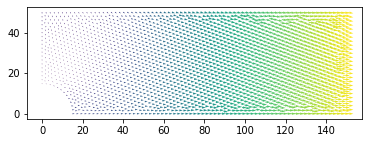

In [ ]:
plot(u_fine)

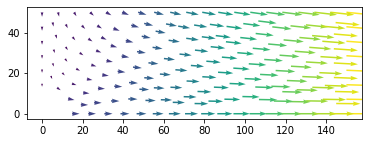

In [ ]:
plot(u_coarse)

Next, we extrapolate the coarse displacement on the fine mesh.

In [ ]:
u_coarse.set_allow_extrapolation(True)
u_interp_coarse = interpolate(u_coarse,Vfine)

We can visualise the differences between the two displacements.

Calling FFC just-in-time (JIT) compiler, this may take some time.


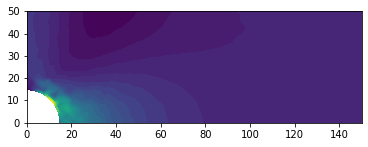

In [ ]:
plot(inner(u_fine-u_interp_coarse,u_fine-u_interp_coarse))

Eventually, we compute the error and the relative error.

In [ ]:
u_interp_coarse.set_allow_extrapolation(True)
Error = errornorm(u_fine,u_interp_coarse)
Relativeerror = Error/norm(u_fine)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


You can perform this analysis with finer and finer meshes and evaluate the convergence rate. Ideally, you will use an exact analytical solution to compute the error above. There is no analytical solution for our problem, so you can simply use the solution obtained with a very fine mesh.

## Load and plot results

In this section, I show you how to load the results from your drive and compare them with the analytical solution (for an infinite plate). I suggest you write your own post-processing routine for your report, including:

* both sigma_xx and sigma_yy (always use rescaled values), 
* stresses obtained with different meshes, 
* stresses obtained with different element types, 
* stresses obtained with the analytical prediction (infinite plate model),
* stresses measured experimentally (download them from Moodle). 

**Do not simply copy-paste the graphic obtained with the code below!**

In [ ]:
# we define a fine set of horizontal coordinates
x_fine = np.linspace(R+0.01,L,1000)
# we define the analytical prediction for sigma_xx for the infinite plate case
stress_xx_theoretical=np.ones(x_fine.shape[0])-5*R*R/(2*np.power(x_fine,2))+3*np.power(R,4)/(2*np.power(x_fine,4))

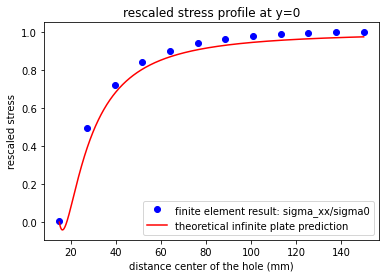

In [ ]:
# we plot the analytical solution and the finite element simulation for the rescaled sigma_xx along the bottom boundary of the domain (y=0)
stress_xx = np.loadtxt("stress-xx.txt")
stress_yy = np.loadtxt("stress-yy.txt")
plt.plot(stress_xx[0],stress_xx[1],'bo',label="finite element result: sigma_xx/sigma0")
plt.plot(x_fine,stress_xx_theoretical,'r-',label="theoretical infinite plate prediction")
plt.ylabel("rescaled stress")
plt.xlabel("distance center of the hole (mm)")
plt.title("rescaled stress profile at y=0")
plt.legend()